<h1 style="font-family:verdana;"> <center>Smart Phone Price Prediction</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Preprocessing </center></p>
<center style="color:#159364; font-family:cursive;">Peace </center></p>


***

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🧹Data Preprocessing<a class="anchor" id="3"></a> 

In [201]:
#importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ignore the warnings 
import warnings
warnings.filterwarnings("ignore")


In [202]:
data = pd.read_csv(r"Flipkart_data.csv")
data.head()

,Model,Stars,Num_of_Ratings,Reviews,Ram,Storage,Expandable,Display,Camera,Battery,Processor,Warranty,Price
0,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,"1,26,250 Ratings","7,344 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,6000 mAh Lithium Ion Battery,Exynos 850 Processor,NaN,"₹9,699"
1,"POCO C50 (Country Green, 32 GB)",4.4,"3,204 Ratings",151 Reviews,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",NaN,"₹5,749"
2,"POCO C50 (Royal Blue, 32 GB)",4.4,"3,204 Ratings",151 Reviews,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",NaN,"₹5,749"
3,"REDMI 10 (Caribbean Green, 64 GB)",4.3,"1,93,536 Ratings","12,428 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02 cm (6.7 inch) HD+ Display,50MP + 2MP | 5MP Front Camera,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,NaN,"₹9,299"
4,"REDMI 10 (Pacific Blue, 64 GB)",4.3,"1,93,536 Ratings","12,428 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02 cm (6.7 inch) HD+ Display,50MP + 2MP | 5MP Front Camera,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,NaN,"₹9,299"


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
📥Importing the Dataset<a class="anchor" id="3"></a> 

In [203]:
data = pd.read_csv("Flipkart_data.csv")

In [204]:
# 'shape' returns the dimensions of the data
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])

Number of rows: 787
Number of columns: 13


In [205]:
# 'isnull().sum()' returns the number of missing values in each variable
Total = data.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# the variable with highest percentage of missing values will appear first
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = data[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
Warranty,787,100.000000,float64
Expandable,340,43.202033,object
Processor,25,3.176620,object
Stars,4,0.508259,float64
Num_of_Ratings,4,0.508259,object
...,...,...,...
Storage,0,0.000000,object
Display,0,0.000000,object
Camera,0,0.000000,object
Battery,0,0.000000,object


In [206]:
data.duplicated().sum()

0

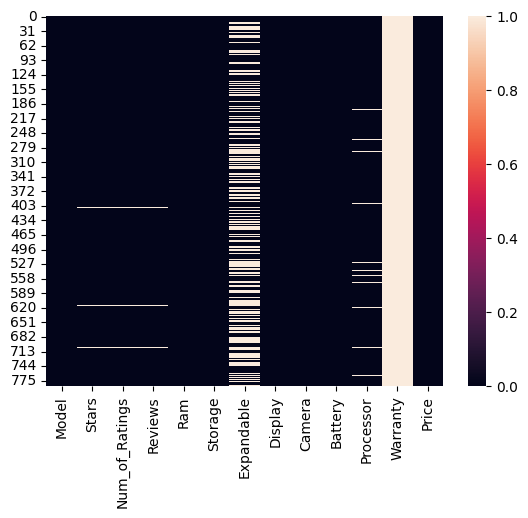

In [207]:
sns.heatmap(data.isnull())
plt.show()

*As we can see there a few missing values in the data with no data in the `Warranty` column.*  
*So we will eliminate the column as it will be contributing no information at all to the model*

In [208]:
data.drop(columns=["Warranty"],inplace=True)

*Step - 1: we take a look the price column...the values in it are in the `str` format*  
*So we will extract the numerical values and also convert the price column to be in the `int` datatype*

In [209]:
data['Price'] = data['Price'].str.replace('₹', '').str.replace(',', '').astype(int)

*Step 2: Correcting the model names:*  

*As we can see some of the models have been repeated in this data on the basis of the colour variant.*    
*I will change the model names so as to include the colour variants...and create a new column from them named*   *`Colur` while excluding the rest of the data as it is the storage which has its own separate column*

In [210]:
# Extract model name and memory size from model column
model_regex = r'(.*)\((.*)\, (\d+) (?:GB|TB)\)'
data[['Model', 'Color', 'Memory']] = data['Model'].str.extract(model_regex)

# Strip whitespace from color and memory columns
data['Color'] = data['Color'].str.strip()
data['Memory'] = data['Memory'].str.strip()

# Remove last 6 characters (i.e. ' 64 GB)') from Model column
data['Model'] = data['Model'].str.replace(model_regex, r'\1', regex=True)

data

,Model,Stars,Num_of_Ratings,Reviews,Ram,Storage,Expandable,Display,Camera,Battery,Processor,Price,Color,Memory
0,SAMSUNG Galaxy F13,4.4,"1,26,250 Ratings","7,344 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,6000 mAh Lithium Ion Battery,Exynos 850 Processor,9699,Waterfall Blue,64
1,POCO C50,4.4,"3,204 Ratings",151 Reviews,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5749,Country Green,32
2,POCO C50,4.4,"3,204 Ratings",151 Reviews,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5749,Royal Blue,32
3,REDMI 10,4.3,"1,93,536 Ratings","12,428 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02 cm (6.7 inch) HD+ Display,50MP + 2MP | 5MP Front Camera,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,9299,Caribbean Green,64
4,REDMI 10,4.3,"1,93,536 Ratings","12,428 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02 cm (6.7 inch) HD+ Display,50MP + 2MP | 5MP Front Camera,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,9299,Pacific Blue,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,SAMSUNG Galaxy A04e,4.3,19 Ratings,2 Reviews,4 GB RAM,128 GB RO,Expandable Upto 1 TB,16.51 cm (6.5 inch) HD+ Display,13MP + 2MP | 5MP Front Camera,5000 mAh Lithium Ion Battery,Mediatek Helio P35 Processor,11499,Light Blue,128
783,Infinix Hot 11 2022,4.2,"17,231 Ratings","1,402 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02 cm (6.7 inch) Full HD+ Display,13 MP + 2 MP Depth Lens | 8MP Front Camera,5000 mAh Li-ion Polymer Battery,UniSoc T610 Processor,9999,Aurora Green,64
784,APPLE iPhone 14 Plus,4.7,"4,616 Ratings",346 Reviews,512 GB RO,512 GB ROM,NaN,17.02 cm (6.7 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,"A15 Bionic Chip, 6 Core Processor Processor",1 Year Warranty for Phone and 6 Months Warrant...,109999,Starlight,512
785,REDMI A1,4.3,"4,641 Ratings",230 Reviews,2 GB RAM,32 GB ROM,NaN,16.56 cm (6.52 inch) Display,5MP Rear Camera,5000 mAh Battery,12 months,6599,Light Green,32


*I had to configure the regex code to take the memory part of the title as well...so lets drop the memeory column*  
*to avoid repetition of the same kind of data* 

In [211]:
data.drop(columns=["Memory"],inplace=True)

In [212]:
# Now checking for duplicate vlaues
data.duplicated().sum()

0

*Step - 3: As this data was scrapped by me from the *Flipkart* website I know that there are many feature phones data in this dataframe*   
 
*I choose to delete such values by using the price range as the logic as most feature phones are in the 1500-2500 range, as feature phones are kind of outdated and also because here we are dealing with high tech smartphones*  

In [213]:
data = data[data['Price'] > 2700]

In [214]:
data.shape

(672, 13)

In [215]:
# Rechecking the null values
data.isnull().sum()

Model             8
Stars             3
Num_of_Ratings    3
Reviews           3
Ram               0
                 ..
Camera            0
Battery           0
Processor         0
Price             0
Color             8
Length: 13, dtype: int64

In [216]:
# As we can see the Expamdable column has 282 missing values, lets try and fill them
mode_value = data['Expandable'].mode()[0]
data['Expandable'] = data['Expandable'].fillna(mode_value)
data.dropna(inplace=True)
# Iam using the mode value to fill the missing values since the expandable option is pretty generic for most 
# smartphones.

In [217]:
# Checking if the values have been imputed
data.isnull().sum()

Model             0
Stars             0
Num_of_Ratings    0
Reviews           0
Ram               0
                 ..
Camera            0
Battery           0
Processor         0
Price             0
Color             0
Length: 13, dtype: int64

*Converting the `Stars` column to numerical values*

In [218]:
data['Stars'] = data['Stars'].astype(float)

*Converting the Ratings and the reviews to numerical values*

In [219]:
data['Num_Ratings'] = data['Num_of_Ratings'].str.replace(',', '').str.extract('(\d+)').astype(int)
data['Num_Reviews'] = data['Reviews'].str.replace(',', '').str.extract('(\d+)').astype(int)

# Drop the original columns
data.drop(['Num_of_Ratings', 'Reviews'], axis=1, inplace=True)

*Inspecting the Ram column*

In [220]:
data.Ram.unique()

array(['4 GB RAM ', '2 GB RAM ', '128 GB RO', '6 GB RAM ', '64 GB RO',
       '8 GB RAM ', '3 GB RAM ', '12 GB RAM ', '256 GB RO', '4 MB RAM ',
       '512 GB RO'], dtype=object)

*Fixing the Anamolies in the `Ram` column*

In [221]:
# Find the mode of the Ram column
mode_value = data['Ram'].mode()[0]

# Create a dictionary mapping of values to replace with the mode value
replace_dict = {'128 GB RO': mode_value,
                '64 GB RO': mode_value,
                '256 GB RO': mode_value,
                '4 MB RAM ': mode_value,
                '512 GB RO': mode_value}

# Replace the values with the mode value
data['Ram'] = data['Ram'].replace(replace_dict)

In [222]:
data.Ram.unique()

array(['4 GB RAM ', '2 GB RAM ', '6 GB RAM ', '8 GB RAM ', '3 GB RAM ',
       '12 GB RAM '], dtype=object)

*As you can see the values now make sense for the ram column*

In [223]:
data.Storage.unique()

array(['64 GB ROM', '32 GB ROM', '128 GB ROM', '128 GB RO', '256 GB RO',
       '256 GB ROM', '16 GB ROM', '512 GB ROM'], dtype=object)

*Inspecting the Storage column*

In [224]:
data.Storage.unique()

array(['64 GB ROM', '32 GB ROM', '128 GB ROM', '128 GB RO', '256 GB RO',
       '256 GB ROM', '16 GB ROM', '512 GB ROM'], dtype=object)

*Replacing the typo errors with the column*

In [225]:
# Rechecking the values
data.Storage.unique()

# This gave us some more errors as it didnt work as intended...so i had to re run the code with the
# updated typos

array(['64 GB ROM', '32 GB ROM', '128 GB ROM', '128 GB RO', '256 GB RO',
       '256 GB ROM', '16 GB ROM', '512 GB ROM'], dtype=object)

In [226]:
data['Storage'] = data['Storage'].str.replace('128 GB ROMM', '128 GB ROM')
data['Storage'] = data['Storage'].str.replace('256 GB ROMM', '256 GB ROM')

*Checking the expandable column*

In [227]:
data.Expandable.unique()

array(['Expandable Upto 1 TB', 'Expandable Upto 512 GB',
       'Expandable Upto 256 GB', ' Expandable Upto 1 TB',
       'Expandable Upto 2 TB', ' Expandable Upto 512 GB',
       ' Expandable Upto 256 GB', ' Expandable Upto 2 TB',
       'Expandable Upto 128 GB'], dtype=object)

*Fixing the repeated values*

In [228]:
data['Expandable'] = data['Expandable'].str.replace(' Expandable Upto 1 TB', 'Expandable Upto 1 TB')
data['Expandable'] = data['Expandable'].str.replace(' Expandable Upto 512 GB', 'Expandable Upto 512 GB')
data['Expandable'] = data['Expandable'].str.replace(' Expandable Upto 256 GB', 'Expandable Upto 256 GB')
data['Expandable'] = data['Expandable'].str.replace(' Expandable Upto 2 TB', 'Expandable Upto 2 TB')

In [229]:
# Rechecking the unique values
data.Expandable.unique()

array(['Expandable Upto 1 TB', 'Expandable Upto 512 GB',
       'Expandable Upto 256 GB', 'Expandable Upto 2 TB',
       'Expandable Upto 128 GB'], dtype=object)

*Checking the Display Column*

*The `Display` column needs some rectifications...we will extract the size in inches for simplicity*

In [230]:
data['display_inches'] = data['Display'].str[:5]

In [232]:
data.head()

,Model,Stars,Ram,Storage,Expandable,Display,Camera,Battery,Processor,Price,Color,Num_Ratings,Num_Reviews,display_inches
0,SAMSUNG Galaxy F13,4.4,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,6000 mAh Lithium Ion Battery,Exynos 850 Processor,9699,Waterfall Blue,126250,7344,16.76
1,POCO C50,4.4,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5749,Country Green,3204,151,16.56
2,POCO C50,4.4,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5749,Royal Blue,3204,151,16.56
3,REDMI 10,4.3,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02 cm (6.7 inch) HD+ Display,50MP + 2MP | 5MP Front Camera,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,9299,Caribbean Green,193536,12428,17.02
4,REDMI 10,4.3,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02 cm (6.7 inch) HD+ Display,50MP + 2MP | 5MP Front Camera,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,9299,Pacific Blue,193536,12428,17.02


In [233]:
data.display_inches.unique()

array(['16.76', '16.56', '17.02', '17.32', '15.49', '16.26', '16.51',
       '16.94', '16.71', '16.64', '16.36', '15.6 ', '16.74', '16.33',
       '16.66', '16.59', '17.22', '17.04', '16.54', '17.53', '17.07',
       '17.27', '16.97', '12.7 ', '16.21', '16.3 ', '16.81', '16.43',
       '13.84', '16.0 ', '16.55', '17.65', '15.8 '], dtype=object)

In [234]:
# Dropping the Display column as it is no longer required
data.drop(columns=["Display"],inplace=True)

*Checking the camera column*

In [235]:
data.Camera.unique()

array(['50MP + 5MP + 2MP | 8MP Front Camera',
       '8MP Dual Camera | 5MP Front Camera',
       '50MP + 2MP | 5MP Front Camera',
       '13Mp + AI Lens | 8MP Front Camera',
       '12MP + 12MP | 12MP Front Camera',
       '50MP + 8MP + 2MP | 8MP Front Camera',
       '50MP + 8MP | 16MP Front Camera',
       '50MP + 8MP + 2MP | 16MP Front Camera',
       '50MP + 8MP + 2MP | 13MP Front Camera',
       '13MP Rear Camera | 5MP Front Camera',
       '50 MP + 2 MP Depth Lens + AI Lens | 8MP Front Camera',
       '50 MP + 2 MP + QVGA | 8MP Front Camera',
       '64MP + 8MP + 2MP | 16MP Front Camera',
       '50MP + 2MP | 8MP Front Camera',
       '8MP Rear Camera | 5MP Front Camera',
       '13MP + AI Lens | 5MP Front Camera',
       '50MP + 8MP + 2MP + 2MP | 16MP Front Camera',
       '13MP + 2MP | 5MP Front Camera',
       '48MP + 2MP + 2MP | 8MP Front Camera',
       '50MP + 2MP + 2MP | 16MP Front Camera',
       '12.2MP + 12MP | 8MP Front Camera',
       '50MP + 2MP + 0.3MP | 8MP Front 

*Preprocessing for the Camera column*

In [236]:
# Since the Camera column has so many values, and the data is cluttered
# we are just extracting the number of cameras from the camera column for simplicity
# Please note that this is the toal number of cameras including the front and the back cameras


def count_cameras(camera_str):
    if "Camera" not in camera_str:
        return 0
    else:
        cameras = camera_str.split("|")[0]
        return len(cameras.split("+"))

data["Num_camera"] = data["Camera"].apply(count_cameras)

In [237]:
data['Num_camera'] = data['Camera'].apply(count_cameras)

In [238]:
data.Num_camera.unique()

array([3, 1, 2, 4, 0], dtype=int64)

*Dropping the Camera column as it is no longer required*

In [239]:
data.drop(columns=["Camera"],inplace=True)

*Analysing the Batttery column*

In [240]:
data['battery_mah'] = data['Battery'].str.extract(r'(\d+)')

# Convert the 'battery_mah' column to numeric data type
data['battery_mah'] = pd.to_numeric(data['battery_mah'], errors='coerce')

# Display the updated DataFrame
data.head()

,Model,Stars,Ram,Storage,Expandable,Battery,Processor,Price,Color,Num_Ratings,Num_Reviews,display_inches,Num_camera,battery_mah
0,SAMSUNG Galaxy F13,4.4,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,6000 mAh Lithium Ion Battery,Exynos 850 Processor,9699,Waterfall Blue,126250,7344,16.76,3,6000
1,POCO C50,4.4,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5749,Country Green,3204,151,16.56,1,5000
2,POCO C50,4.4,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5749,Royal Blue,3204,151,16.56,1,5000
3,REDMI 10,4.3,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,9299,Caribbean Green,193536,12428,17.02,2,6000
4,REDMI 10,4.3,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,9299,Pacific Blue,193536,12428,17.02,2,6000


In [241]:
data.battery_mah.unique()

array([6000, 5000,   15,   13, 4410, 4700, 4310, 4500, 4600, 7000, 4020,
       4980, 4800, 3900, 3020, 5080, 4050, 4000,   14, 5020, 4400, 3100,
       3000, 5200, 4270, 4926, 4230,   16, 3300, 4300, 5160, 4250, 5018,
       5065, 4520, 4610], dtype=int64)

In [242]:
data.battery_mah.mode()

0    5000
Name: battery_mah, dtype: int64

In [243]:
# Replacing the wrong values with the actual values
data['battery_mah'] = data['battery_mah'].replace(13, 4500)
data['battery_mah'] = data['battery_mah'].replace(14, 5000)
data['battery_mah'] = data['battery_mah'].replace(15, 4500)
data['battery_mah'] = data['battery_mah'].replace(16, 4800)

In [244]:
data.battery_mah.unique()

array([6000, 5000, 4500, 4410, 4700, 4310, 4600, 7000, 4020, 4980, 4800,
       3900, 3020, 5080, 4050, 4000, 5020, 4400, 3100, 3000, 5200, 4270,
       4926, 4230, 3300, 4300, 5160, 4250, 5018, 5065, 4520, 4610],
      dtype=int64)

*Analysing the processor column*

In [245]:
data['Processor'].replace(['1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories',
                              'Brand Warranty of 1 Year',
                              'Brand Warranty for 1 Year',
                              '1 Year Warranty',
                              '12 Months Warranty',
                              '1 YEAR ON MOBILE AND 6 MONTHS FOR ACCESORIES',
                              '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box',
                              '1 Year of Device & 6 Months for In-Box Accessories',
                              '1 Year Manufacturer Warranty for Handset and 6 Months Warranty for In the Box Accessories',
                              '12 months on phone & 6 months on accessories',
                              '12 Months brand Warranty , Domestic Only',
                              'One Time Screen Replacement within 100 days of purchase 1 Year warranty on mobile device & 6 months on accessories',
                              'One Time Screen Replacement within 100 days of purchase, 1 Year warranty on mobile device & 6 months on accessories.',
                              '12 MONTHS', 
                              '12 Months warranty',
                              '12 Months Brand Warranty'], np.nan, inplace=True)

In [246]:
data['Processor'].replace(['12 months',
                              '12 Months',
                              'One Time Screen Replacement within 100 days of purchase 1 Year warranty on mobile device &  6 months on accessories',
                              'One Time Screen Replacement within 100 days of purchase, 1 Year warranty on mobile device &  6 months on accessories.',
                              '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories',
                              '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box Accessories',
                              '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for In the Box Accessories',
                              '1 Year for Handset and 6 Months for Inbox Accessories',
                              '" 1 year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase"',
                              '1 year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase',
                              '12Months Brand Warranty',
                              '1 Year  Manufacturer Warranty',
                              '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for In-Box Accessories',
                              '1 Year warranty on mobile device &  6 months on accessories.',
                              '1 year manufacturing warranty for mobile and 6 months for box accessories',
                              '1 Year',
                              ], np.nan, inplace=True)

In [247]:
data.Processor.unique()

array(['Exynos 850 Processor',
       'Mediatek Helio A22 Processor, Upto 2.0 GHz Processor',
       'Qualcomm Snapdragon 680 Processor', 'MediaTek G37 Processor', nan,
       'Qualcomm Snapdragon 750G Processor',
       'Mediatek Dimensity 810 Processor', 'Mediatek Helio G85 Processor',
       'Unisoc T606 Processor', 'Meditek Helio G37 Processor',
       'Qualcomm Snapdragon 695 5G Processor',
       'Mediatek Dimensity 700 Processor', 'Mediatek Helio A22 Processor',
       'Unisoc Spreadtrum SC9863A1 Processor',
       'Mediatek Helio G37 Processor', 'Mediatek Helio P35 Processor',
       'UNISOC T700 Processor', 'Google Tensor Processor',
       'Unisoc Tiger T616 Processor', 'Unisoc T612 Processor',
       'Unisoc T616 Processor', 'Mediatek Helio G95 Processor',
       'Mediatek Helio G96 Processor', 'Mediatek Helio G35 Processor',
       'Qualcomm Snapdragon 778G Processor',
       'Mediatek Helio G99 Processor', 'Dimensity 810 Processor',
       'MediaTek Helio G35 Processor',
 

In [248]:
data.shape

(661, 14)

In [249]:
def add_processor_name_column(df):
    # Extract the string values before "Processor" in the "Product_Name" column
    processor_names = df["Processor"].str.extract(r"^(.+)\sProcessor")

    # Add the "Processor_name" column to the DataFrame with the extracted values
    df["Processor_name"] = processor_names

In [250]:
add_processor_name_column(data)

In [251]:
data.Processor_name.isnull().sum()

156

In [252]:
# calculate the mode value of Processor_name
mode_value = data['Processor_name'].mode()[0]

# fill missing values with mode
data['Processor_name'].fillna(mode_value, inplace=True)

In [253]:
data.isnull().sum()

Model             0
Stars             0
Ram               0
Storage           0
Expandable        0
                 ..
Num_Reviews       0
display_inches    0
Num_camera        0
battery_mah       0
Processor_name    0
Length: 15, dtype: int64

In [254]:
data.drop(columns=['Battery','Processor'],inplace=True)

In [255]:
# Changing the order of the columns for better understanding

data = data[['Model', 'Color', 'Stars', 'Num_Ratings', 'Num_Reviews', 'Ram', 'Storage', 'Expandable', 'Processor_name', 'display_inches', 'Num_camera', 'battery_mah', 'Price']]


In [256]:
data.reset_index(inplace=True)

In [257]:
data.columns

Index(['index', 'Model', 'Color', 'Stars', 'Num_Ratings', 'Num_Reviews', 'Ram',
       'Storage', 'Expandable', 'Processor_name', 'display_inches',
       'Num_camera', 'battery_mah', 'Price'],
      dtype='object')

In [258]:
data.drop(columns=['index'],inplace=True)

In [259]:
# create a function to map processor names to categories
def map_processor_name(name):
    if "mediatek" in name.lower():
        return "Mediatek processor"
    elif "qualcomm" in name.lower():
        return "Qualcomm processor"
    elif "unisoc" in name.lower():
        return "Unisoc processor"
    elif "exynos" in name.lower():
        return "Exynos processor"
    elif "tensor" in name.lower():
        return "Google Tensor processor"
    elif "helio" in name.lower():
        return "Helio processor"
    else:
        return "Other processor"

# apply the function to the processor_name column
data['processor_category'] = data['Processor_name'].apply(map_processor_name)

In [260]:
# Dropping the Processor column as it is no longer required
data.drop("Processor_name",axis=1,inplace=True)

In [261]:
data.processor_category.unique()

array(['Exynos processor', 'Mediatek processor', 'Qualcomm processor',
       'Unisoc processor', 'Helio processor', 'Google Tensor processor',
       'Other processor'], dtype=object)

*Analysing the Colour Column*

In [262]:
data.Color.unique()

array(['Waterfall Blue', 'Country Green', 'Royal Blue', 'Caribbean Green',
       'Pacific Blue', 'Nightsky Green', 'Midnight Black', 'Aurora Green',
       'Racing Black', 'Fantasy Purple', 'Luna Blue', 'Sunrise Copper',
       'Purple', 'Forest Green', 'Shadow Black', 'White', 'Aqua Blue',
       'Yellow', 'Charcoal Grey', 'Baby Blue', 'Copper Blush',
       'Metallic White', 'Sunrise Orange', 'Blue', 'Creamy White',
       'Exploratory Blue', '7° Purple', 'Meteorite Grey', 'Alpine White',
       'Black', 'Laser Blue', 'Power Black', 'Frosted Blue',
       'Force Black', 'Origin Blue', 'Aqua Sky', 'Night Black',
       'Azure Blue', 'Mineral Gray', 'Cosmic Black', 'Satin Silver',
       'Midnight Gray', 'Turquoise Cyan', 'Polar Black', 'Laser Black',
       'Jade Purple', 'Cool Blue', 'Carbon Gray', 'Midnight',
       'Metaverse Blue', 'Starlight', 'Opal Green', 'Starry Sky',
       'Midnight Galaxy', 'Chalk', 'Glowing Black', 'Denim Black',
       'Electric Blue', 'Space Blue', 'Gra

In [263]:
# Grouping the colours into categories for simplicity

# Define the group_colors() function
def group_colors(color):
    if "blue" in color.lower() or "cyan" in color.lower():
        return "Blue"
    elif "green" in color.lower():
        return "Green"
    elif "black" in color.lower() or "charcoal" in color.lower() or "obsidian" in color.lower():
        return "Black"
    elif "yellow" in color.lower() or "gold" in color.lower():
        return "Yellow"
    elif "grey" in color.lower():
        return "Grey"
    elif "white" in color.lower():
        return "White"
    elif "orange" in color.lower():
        return "Orange"
    elif "silver" in color.lower() or "diamond" in color.lower():
        return "Silver"
    elif "red" in color.lower() or "pink" in color.lower():
        return "Red"
    elif "brown" in color.lower():
        return "Brown"
    else:
        return "Other"

In [264]:
# Apply the group_colors() function on the "color" column
data["color_group"] = data["Color"].apply(group_colors)

In [265]:
data

,Model,Color,Stars,Num_Ratings,Num_Reviews,Ram,Storage,Expandable,display_inches,Num_camera,battery_mah,Price,processor_category,color_group
0,SAMSUNG Galaxy F13,Waterfall Blue,4.4,126250,7344,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,16.76,3,6000,9699,Exynos processor,Blue
1,POCO C50,Country Green,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56,1,5000,5749,Mediatek processor,Green
2,POCO C50,Royal Blue,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56,1,5000,5749,Mediatek processor,Blue
3,REDMI 10,Caribbean Green,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02,2,6000,9299,Qualcomm processor,Green
4,REDMI 10,Pacific Blue,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02,2,6000,9299,Qualcomm processor,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,I Kall Z5,Blue,3.0,1760,132,3 GB RAM,16 GB ROM,Expandable Upto 1 TB,13.84,1,3000,4699,Qualcomm processor,Blue
657,SAMSUNG Galaxy A04e,Light Blue,4.3,19,2,4 GB RAM,128 GB RO,Expandable Upto 1 TB,16.51,2,5000,11499,Mediatek processor,Blue
658,Infinix Hot 11 2022,Aurora Green,4.2,17231,1402,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02,2,5000,9999,Unisoc processor,Green
659,APPLE iPhone 14 Plus,Starlight,4.7,4616,346,4 GB RAM,512 GB ROM,Expandable Upto 1 TB,17.02,2,4500,109999,Qualcomm processor,Other


In [266]:
# Dropping the Color column as it is not required
data.drop("Color",axis=1,inplace=True)

In [267]:
data.color_group.unique()

array(['Blue', 'Green', 'Black', 'Other', 'White', 'Yellow', 'Orange',
       'Grey', 'Silver', 'Red', 'Brown'], dtype=object)

*Analysing the Model Column*

In [268]:
data.Model.unique()

array(['SAMSUNG Galaxy F13 ', 'POCO C50 ', 'REDMI 10 ',
       'Infinix HOT 20 Play ', 'APPLE iPhone 14 ',
       'SAMSUNG Galaxy F23 5G ', 'APPLE iPhone 11 ', 'POCO M4 Pro 5G ',
       'MOTOROLA g52 ', 'MOTOROLA g31 ', 'MOTOROLA e13 ',
       'Infinix Hot 12 ', 'Infinix NOTE 12i ', 'POCO X4 Pro 5G ',
       'POCO M4 5G ', 'MOTOROLA G62 5G ', 'Infinix Smart 6 HD ',
       'Infinix SMART 7 ', 'MOTOROLA G32 ', 'MOTOROLA g22 ',
       'SAMSUNG Galaxy F04 ', 'MOTOROLA e40 ', 'APPLE iPhone 13 ',
       'vivo T1 44W ', 'Google Pixel 6a ', 'realme C35 ',
       'Realme C30 - Locked with Airtel Prepaid ', 'Infinix Hot 12 Pro ',
       'vivo T1X ', 'SAMSUNG Galaxy M33 5G ', 'REDMI Note 10S ',
       'POCO M4 Pro ', 'MOTOROLA g82 5G ', 'OPPO A17 ', 'POCO X5 Pro 5G ',
       'MOTOROLA g72 ', 'OPPO A17k ', 'Infinix Hot 20 5G ', 'REDMI 10A ',
       'POCO C31 ', 'realme C33 ', 'realme C30 ', 'vivo T1 Pro 5G ',
       'REDMI 9i Sport ', 'REDMI A1 ', 'MOTOROLA e32 ',
       'OnePlus Nord CE 2 Lite 5G

In [269]:
# use regex to split the first word in the Model column and create two new columns
data[['Company', 'model_name']] = data['Model'].str.extract('^(\S+)\s(.+)$')

In [270]:
data.Company.unique()

array(['SAMSUNG', 'POCO', 'REDMI', 'Infinix', 'APPLE', 'MOTOROLA', 'vivo',
       'Google', 'realme', 'Realme', 'OPPO', 'OnePlus', 'Nothing',
       'Micromax', 'Tecno', 'IQOO', 'Redmi', 'I', 'itel', 'Motorola',
       'oppo', 'LAVA', 'Nokia', 'ASUS', 'Xiaomi', 'Mi'], dtype=object)

In [271]:
data.Company.replace({'I':'Infinix'},inplace=True)

In [272]:
# Dropping the Model column as it is no longer required
data.drop(columns=["Model"],inplace=True)

In [273]:
# Changing the order of the columns after making the changes

data = data[["Company",'model_name', 'color_group', 'Stars', 'Num_Ratings', 'Num_Reviews', 'Ram', 'Storage', 'Expandable', 'processor_category', 'display_inches', 'Num_camera', 'battery_mah', 'Price']]


In [274]:
pd.set_option("display.max_rows",10)

*Taking a look at the finalized Dataframe*

In [278]:
data.head()

,Company,model_name,color_group,Stars,Num_Ratings,Num_Reviews,Ram,Storage,Expandable,processor_category,display_inches,Num_camera,battery_mah,Price
0,SAMSUNG,Galaxy F13,Blue,4.4,126250,7344,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Exynos processor,16.76,3,6000,9699
1,POCO,C50,Green,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
2,POCO,C50,Blue,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
3,REDMI,10,Green,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299
4,REDMI,10,Blue,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299


*Exporting the cleaned datafame in the form of a csv file*

In [277]:
data.to_csv('mobile_finaldata.csv', index=False)